In [67]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [68]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [69]:
train = pd.read_csv('./data/credit_train.csv')
test = pd.read_csv('./data/credit_test.csv')

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

In [71]:
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [72]:
train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [73]:
train[train['Annual Income'] > 1e8]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
85662,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,176132.0,Short Term,7250.0,165557393.0,10+ years,Home Mortgage,Debt Consolidation,15176.06,16.0,NaN,11.0,0.0,312778.0,669438.0,0.0,0.0


In [74]:
#This row should be dropped as it will skew the results.
train.drop(train.index[85662], inplace=True)

In [75]:
train['Loan Status'].isnull().sum()

514

In [76]:
train[train['Loan Status'].isnull() == True]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
train.drop(train.tail(514).index, inplace=True)

In [78]:
test[test['Loan ID'].isnull()==True]

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
test.drop(test.tail(353).index, inplace=True)

In [80]:
train['Loan Status'].isnull().sum()

0

In [81]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1) 
       
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [82]:
print(missing_values_table(train))
print(missing_values_table(test))

                              Missing Values  % of Total Values
Months since last delinquent           53140               53.1
Credit Score                           19154               19.2
Annual Income                          19154               19.2
Years in current job                    4222                4.2
Bankruptcies                             204                0.2
Tax Liens                                 10                0.0
Maximum Open Credit                        2                0.0
                              Missing Values  % of Total Values
Months since last delinquent            5306               53.1
Credit Score                            1981               19.8
Annual Income                           1981               19.8
Years in current job                     427                4.3
Bankruptcies                              22                0.2
Tax Liens                                  1                0.0


In [83]:
split = train.shape[0]
predict = train['Loan Status']
train.drop(['Loan Status'], axis=1, inplace=True)
train.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [84]:
total = pd.concat([train,test], sort=False)
total.isnull().sum()

Loan ID                             0
Customer ID                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21135
Annual Income                   21135
Years in current job             4649
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    58446
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      226
Tax Liens                          11
dtype: int64

In [85]:
#Filling NA values in Months since last delinquent with 0 since this is likely what NA means in this case.
total['Months since last delinquent'].fillna(0, inplace=True)

In [86]:
missing_values_table(total)

,Missing Values,% of Total Values
Credit Score,21135,19.2
Annual Income,21135,19.2
Years in current job,4649,4.2
Bankruptcies,226,0.2
Tax Liens,11,0.0
Maximum Open Credit,2,0.0


In [87]:
#I will fill Bankruptcies and Tax Liens with 0 as well since they are binary variable.
total['Bankruptcies'].fillna(0, inplace=True)
total['Tax Liens'].fillna(0, inplace=True)

In [88]:
total['Maximum Open Credit'].fillna(total['Maximum Open Credit'].mean(), inplace=True)

In [89]:
missing_values_table(total)

,Missing Values,% of Total Values
Credit Score,21135,19.2
Annual Income,21135,19.2
Years in current job,4649,4.2


In [90]:
total.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.099990e+05,88864.000000,8.886400e+04,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,1.099990e+05,1.099990e+05,109999.000000,109999.000000
mean,1.174631e+07,1076.525173,1.375601e+06,18468.556755,18.202505,16.359831,11.124492,0.168056,2.942820e+05,7.541020e+05,0.117374,0.029446
std,3.176729e+07,1475.444874,9.102755e+05,12195.615786,7.015604,23.011974,5.011116,0.484391,3.772790e+05,8.013966e+06,0.350971,0.261043
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.795970e+05,705.000000,8.488440e+05,10211.930000,13.500000,0.000000,8.000000,0.000000,1.121950e+05,2.731630e+05,0.000000,0.000000
50%,3.120260e+05,724.000000,1.173440e+06,16202.630000,16.900000,0.000000,10.000000,0.000000,2.096650e+05,4.673900e+05,0.000000,0.000000
75%,5.239300e+05,741.000000,1.651670e+06,23997.665000,21.700000,30.000000,14.000000,0.000000,3.674885e+05,7.831890e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,3.647544e+07,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [91]:
#max of Credit Score is scaled by a power of 10, we need to scale them back
total['Credit Score'] = total['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

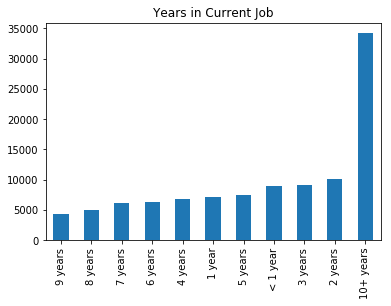

In [92]:
%matplotlib inline
total['Years in current job'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Years in Current Job')

In [93]:
#impute missing values in Years... with 10+ years
total['Years in current job'].fillna('10+ years', inplace=True)

In [94]:
missing_values_table(total)

,Missing Values,% of Total Values
Credit Score,21135,19.2
Annual Income,21135,19.2


In [95]:
#It looks like Credit Score and Annual Income NA values are related.
total[total['Credit Score'].isna() == True]

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
11,fa096848-6143-4907-b2cf-852a0b06171c,aa0a6a22-a95e-48e0-ba4f-b83456d424e4,541970.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Home Improvements,23568.55,23.2,0.0,23.0,0.0,60705.0,1634468.0,0.0,0.0
15,7cbaa3fa-16fd-4343-9bcb-e90b34a1072f,3ec886e7-f15d-4c35-83d0-bdec4817ae4b,449020.0,Long Term,NaN,NaN,9 years,Own Home,Debt Consolidation,18904.81,19.4,0.0,8.0,0.0,334533.0,428956.0,0.0,0.0
16,c9a16a9d-8801-4430-b445-dbf9cf845e31,abb4c446-08ea-49ff-aeb8-5e1e9da673e7,653004.0,Long Term,NaN,NaN,7 years,Home Mortgage,Debt Consolidation,14537.09,20.5,0.0,9.0,0.0,302309.0,413754.0,0.0,0.0
18,c6be21f0-80b1-46b3-8019-16646fd2137d,c67b2cb5-9f91-4bcb-9a03-03d1589c6c1a,66396.0,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,9898.81,27.1,0.0,23.0,1.0,9728.0,402380.0,1.0,0.0
29,dcf093ca-d26b-4853-9679-aa0c7ebe05a7,5129cffc-68a1-4dd9-8bfe-035f3478d6dd,107404.0,Short Term,NaN,NaN,10+ years,Home Mortgage,other,19238.07,43.7,0.0,5.0,0.0,28956.0,58014.0,0.0,0.0
34,83ad0662-ef2d-4732-99ff-e9cdab4eb276,2d53b50a-30a2-488e-a287-3780b26e62ba,109318.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Buy a Car,15524.90,22.7,0.0,9.0,0.0,77121.0,920524.0,0.0,0.0
38,03e3a77a-fa93-489c-b7b3-c06196ba3bce,dedbd71d-dabd-4c64-a38f-bb5886e7f8b6,259842.0,Short Term,NaN,NaN,8 years,Home Mortgage,Debt Consolidation,11792.73,20.6,34.0,9.0,0.0,401584.0,708818.0,0.0,0.0


In [96]:
#For now we will impute the mean.
total['Credit Score'].fillna(total['Credit Score'].mean(), inplace=True)
total['Annual Income'].fillna(total['Annual Income'].mean(), inplace=True)

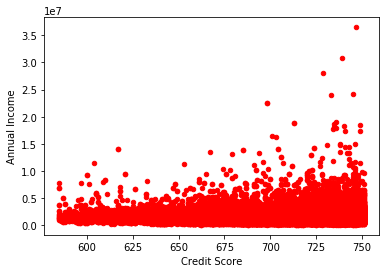

In [97]:
#No one with a credit score below ~700 has an annual income above 250k. We have one outlier with a very large income.
total.plot(kind='scatter', x='Credit Score', y='Annual Income', color='Red')

In [98]:
total.drop(['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [99]:
total.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

In [100]:
total["Tax Liens"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      1.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
9970    0.0
9971    0.0
9972    0.0
9973    0.0
9974    0.0
9975    0.0
9976    0.0
9977    0.0
9978    0.0
9979    0.0
9980    0.0
9981    0.0
9982    0.0
9983    0.0
9984    0.0
9985    0.0
9986    0.0
9987    0.0
9988    0.0
9989    0.0
9990    0.0
9991    0.0
9992    0.0
9993    0.0
9994    0.0
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: Tax Liens, Length: 109999, dtype: float64

In [101]:
total = MultiColumnLabelEncoder(columns=['Term','Years in current job', 'Home Ownership', 'Purpose']).fit_transform(total)
#column numbers: 1, 4, 5, 6

In [102]:
train = total[:split]
test = total[split:]

In [103]:
train.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,1,709.000000,1.167493e+06,8,1,5,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,1,716.323832,1.375601e+06,1,1,3,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,1,741.000000,2.231892e+06,8,2,3,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,0,721.000000,8.069490e+05,3,2,3,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,1,716.323832,1.375601e+06,5,3,3,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0


In [104]:
y = predict.replace(to_replace=['Fully Paid', 'Charged Off'], value=[0,1])

In [105]:
y

0        0
1        0
2        0
3        0
4        0
5        1
6        0
7        1
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       1
17       0
18       0
19       0
20       1
21       0
22       1
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
99970    0
99971    0
99972    0
99973    0
99974    0
99975    1
99976    0
99977    0
99978    0
99979    0
99980    0
99981    1
99982    0
99983    0
99984    0
99985    0
99986    0
99987    0
99988    1
99989    1
99990    0
99991    0
99992    0
99993    0
99994    0
99995    0
99996    0
99997    0
99998    0
99999    0
Name: Loan Status, Length: 99999, dtype: int64

In [106]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
    #'application': 'binary', # for binary classification
#     'num_class' : 1, # used for multi-classes
    'boosting': ['gbdt', 'dart'], # traditional gradient boosting decision tree
    #'num_iterations': 500, 
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'num_leaves': [6, 14, 31, 64],
    #'device': 'gpu', # you can use GPU to achieve faster learning
    #'max_depth': -1, # <0 means no limit
    #'max_bin': 510, # Small number of bins may reduce training accuracy but can deal with over-fitting
    'reg_alpha': [0, 1e-1, 2, 7, 25, 100], # L1 regularization
    'reg_lambda': [0, 1e-1, 2, 7, 25, 100], # L2 regularization
    #'metric' : 'roc_auc',
    #'subsample_for_bin': [1e5, 2e5, 3e5], # number of samples for constructing bins
    'subsample': [0.3, 0.6, 0.8], # subsample ratio of the training instance
    'colsample_bytree': [0.2, 0.4, 0.6, 0.8], # subsample ratio of columns when constructing the tree
    'min_split_gain': [0.0, 0.1, 0.01], # minimum loss reduction required to make further partition on a leaf node of the tree
    'min_child_weight': [1e-4, 1e-3, 1e-2, 1e-1], # minimum sum of instance weight (hessian) needed in a leaf
    'min_child_samples': [5, 20, 50],# minimum number of data needed in a leaf
    'importance_type': ['split', 'gain']
}

# Initiate classifier to use
mdl = lgb.LGBMClassifier(
          n_estimators = 1000,
          objective = 'regression', 
          n_jobs = -1, 
          silent = True,
          max_depth = -1,
          subsample_freq=1,
          is_unbalance=True,
          device='gpu'
        )


In [47]:
grid = GridSearchCV(mdl, param_grid, verbose=1, cv=3, scoring='roc_auc', n_jobs=-1)

In [48]:
grid.fit(train, y)

Fitting 3 folds for each of 995328 candidates, totalling 2985984 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


LightGBMError: GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [109]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix

In [141]:
mdl.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:741: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))


LGBMClassifier(boosting_type='gbdt', categorical_feature=[1, 4, 5, 6],
        class_weight=None, colsample_bytree=1.0, importance_type='split',
        learning_rate=0.1, max_bin=512, max_depth=-1, min_child_samples=20,
        min_child_weight=1, min_split_gain=0.0, n_estimators=1000,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [142]:
pred = mdl.predict(X_test)

In [110]:
def scoring(pred, y):
    roc = roc_auc_score(pred, y)
    print("ROC AUC Score:", roc)
    acc = accuracy_score(pred, y)
    print("Accuracy Score:", acc)
    conf = confusion_matrix(pred, y)
    print("Confusion Matrix:")
    print(conf)

In [145]:
scoring(pred, y_test)

ROC AUC Score: 0.6502711323763954
Accuracy Score: 0.7751515151515151
Confusion Matrix:
[[24736  6614]
 [  806   844]]


In [146]:
import xgboost as xgb

In [147]:
clf_xgb = xgb.XGBClassifier(n_jobs=1000, nthreads=-1, scale_pos_weight = 3.4)

In [149]:
clf_xgb.fit(X_train.values, y_train)
pred = clf_xgb.predict(X_test.values)
scoring(pred, y_test)

ROC AUC Score: 0.5926461602829629
Accuracy Score: 0.5666363636363636
Confusion Matrix:
[[13111  1870]
 [12431  5588]]


In [111]:
import catboost as cat

In [112]:
clf_cat = cat.CatBoostClassifier(cat_features=[1,4,5,6], iterations=1000, scale_pos_weight=3.4, eval_metric="AUC", early_stopping_rounds=10, )

In [113]:
clf_cat.fit(X_train, y_train)

Learning rate set to 0.055068
0:	total: 28.9ms	remaining: 28.8s
1:	total: 57.8ms	remaining: 28.8s
2:	total: 90.7ms	remaining: 30.2s
3:	total: 122ms	remaining: 30.4s
4:	total: 156ms	remaining: 31.1s
5:	total: 196ms	remaining: 32.5s
6:	total: 243ms	remaining: 34.5s
7:	total: 277ms	remaining: 34.3s
8:	total: 310ms	remaining: 34.1s
9:	total: 344ms	remaining: 34s
10:	total: 377ms	remaining: 33.9s
11:	total: 412ms	remaining: 34s
12:	total: 455ms	remaining: 34.5s
13:	total: 486ms	remaining: 34.2s
14:	total: 516ms	remaining: 33.9s
15:	total: 547ms	remaining: 33.6s
16:	total: 582ms	remaining: 33.6s
17:	total: 621ms	remaining: 33.9s
18:	total: 661ms	remaining: 34.1s
19:	total: 695ms	remaining: 34.1s
20:	total: 729ms	remaining: 34s
21:	total: 759ms	remaining: 33.7s
22:	total: 792ms	remaining: 33.7s
23:	total: 828ms	remaining: 33.7s
24:	total: 881ms	remaining: 34.4s
25:	total: 914ms	remaining: 34.3s
26:	total: 948ms	remaining: 34.2s
27:	total: 979ms	remaining: 34s
28:	total: 1.01s	remaining: 33.8s

240:	total: 9.55s	remaining: 30.1s
241:	total: 9.59s	remaining: 30s
242:	total: 9.63s	remaining: 30s
243:	total: 9.67s	remaining: 30s
244:	total: 9.71s	remaining: 29.9s
245:	total: 9.77s	remaining: 29.9s
246:	total: 9.81s	remaining: 29.9s
247:	total: 9.85s	remaining: 29.9s
248:	total: 9.9s	remaining: 29.9s
249:	total: 9.94s	remaining: 29.8s
250:	total: 9.99s	remaining: 29.8s
251:	total: 10s	remaining: 29.8s
252:	total: 10.1s	remaining: 29.8s
253:	total: 10.1s	remaining: 29.7s
254:	total: 10.2s	remaining: 29.7s
255:	total: 10.2s	remaining: 29.6s
256:	total: 10.2s	remaining: 29.6s
257:	total: 10.3s	remaining: 29.6s
258:	total: 10.3s	remaining: 29.5s
259:	total: 10.4s	remaining: 29.5s
260:	total: 10.4s	remaining: 29.4s
261:	total: 10.4s	remaining: 29.4s
262:	total: 10.5s	remaining: 29.4s
263:	total: 10.5s	remaining: 29.3s
264:	total: 10.6s	remaining: 29.3s
265:	total: 10.6s	remaining: 29.2s
266:	total: 10.6s	remaining: 29.2s
267:	total: 10.7s	remaining: 29.2s
268:	total: 10.7s	remaining: 

477:	total: 19.9s	remaining: 21.7s
478:	total: 20s	remaining: 21.7s
479:	total: 20s	remaining: 21.7s
480:	total: 20.1s	remaining: 21.7s
481:	total: 20.2s	remaining: 21.7s
482:	total: 20.2s	remaining: 21.7s
483:	total: 20.3s	remaining: 21.6s
484:	total: 20.4s	remaining: 21.6s
485:	total: 20.4s	remaining: 21.6s
486:	total: 20.4s	remaining: 21.5s
487:	total: 20.5s	remaining: 21.5s
488:	total: 20.5s	remaining: 21.5s
489:	total: 20.6s	remaining: 21.4s
490:	total: 20.6s	remaining: 21.4s
491:	total: 20.7s	remaining: 21.4s
492:	total: 20.7s	remaining: 21.3s
493:	total: 20.8s	remaining: 21.3s
494:	total: 20.8s	remaining: 21.2s
495:	total: 20.9s	remaining: 21.2s
496:	total: 20.9s	remaining: 21.2s
497:	total: 20.9s	remaining: 21.1s
498:	total: 21s	remaining: 21.1s
499:	total: 21s	remaining: 21s
500:	total: 21.1s	remaining: 21s
501:	total: 21.1s	remaining: 21s
502:	total: 21.2s	remaining: 20.9s
503:	total: 21.2s	remaining: 20.9s
504:	total: 21.3s	remaining: 20.8s
505:	total: 21.3s	remaining: 20.8s

715:	total: 30.6s	remaining: 12.1s
716:	total: 30.6s	remaining: 12.1s
717:	total: 30.7s	remaining: 12.1s
718:	total: 30.7s	remaining: 12s
719:	total: 30.8s	remaining: 12s
720:	total: 30.8s	remaining: 11.9s
721:	total: 30.9s	remaining: 11.9s
722:	total: 30.9s	remaining: 11.8s
723:	total: 30.9s	remaining: 11.8s
724:	total: 31s	remaining: 11.8s
725:	total: 31s	remaining: 11.7s
726:	total: 31.1s	remaining: 11.7s
727:	total: 31.1s	remaining: 11.6s
728:	total: 31.2s	remaining: 11.6s
729:	total: 31.2s	remaining: 11.5s
730:	total: 31.3s	remaining: 11.5s
731:	total: 31.3s	remaining: 11.5s
732:	total: 31.3s	remaining: 11.4s
733:	total: 31.4s	remaining: 11.4s
734:	total: 31.4s	remaining: 11.3s
735:	total: 31.5s	remaining: 11.3s
736:	total: 31.5s	remaining: 11.2s
737:	total: 31.6s	remaining: 11.2s
738:	total: 31.6s	remaining: 11.2s
739:	total: 31.6s	remaining: 11.1s
740:	total: 31.7s	remaining: 11.1s
741:	total: 31.7s	remaining: 11s
742:	total: 31.8s	remaining: 11s
743:	total: 31.8s	remaining: 10.

955:	total: 41.1s	remaining: 1.89s
956:	total: 41.2s	remaining: 1.85s
957:	total: 41.2s	remaining: 1.81s
958:	total: 41.3s	remaining: 1.76s
959:	total: 41.3s	remaining: 1.72s
960:	total: 41.4s	remaining: 1.68s
961:	total: 41.4s	remaining: 1.64s
962:	total: 41.5s	remaining: 1.59s
963:	total: 41.5s	remaining: 1.55s
964:	total: 41.6s	remaining: 1.51s
965:	total: 41.6s	remaining: 1.46s
966:	total: 41.6s	remaining: 1.42s
967:	total: 41.7s	remaining: 1.38s
968:	total: 41.7s	remaining: 1.33s
969:	total: 41.8s	remaining: 1.29s
970:	total: 41.8s	remaining: 1.25s
971:	total: 41.9s	remaining: 1.21s
972:	total: 41.9s	remaining: 1.16s
973:	total: 42s	remaining: 1.12s
974:	total: 42s	remaining: 1.08s
975:	total: 42s	remaining: 1.03s
976:	total: 42.1s	remaining: 991ms
977:	total: 42.1s	remaining: 948ms
978:	total: 42.2s	remaining: 905ms
979:	total: 42.2s	remaining: 861ms
980:	total: 42.3s	remaining: 819ms
981:	total: 42.3s	remaining: 775ms
982:	total: 42.3s	remaining: 732ms
983:	total: 42.4s	remainin

In [114]:
preds = clf_cat.predict(X_test)
scoring(preds, y_test)

ROC AUC Score: 0.5973186542183863
Accuracy Score: 0.6154848484848485
Confusion Matrix:
[[15237  2384]
 [10305  5074]]


In [117]:
param_grid = {
    'eta': [0.001, 0.01, 0.05, 0.1],
    'l2_leaf_reg': [0, 1, 2, 3, 5, 7, 50, 100],
    #'subsample': [0.5, 0.6, 0.7, 0.8],
    'depth': [4, 8, 16],
    #'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
    'rsm': [0.4, 0.6, 0.8]
}
grid = GridSearchCV(clf_cat, param_grid, verbose=1, cv=3, scoring='roc_auc', n_jobs=-1)

In [118]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 33.3min
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 152.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 426.3min
exception calling callback for <Future at 0x7f66d5a442b0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/parallel.py", line 309, in __call__
    self.parallel.dispatch_next()
  File "/usr/lo

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6)}